# PYTHON WITH DATASCIENCE MARKETING DATA Project #

## - IMPORTING REQUIRED LIBRARIES

In [114]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind

## - Loading and analysing data

In [115]:
mkt_data = pd.read_csv('marketing_data.csv')
print("Displaying Column details of DataFrame:")
print()
mkt_data.info()
print()
print("A top view of DataFrame:")
print()
mkt_data.head(5)

Displaying Column details of DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurcha

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## (A) Fixing format of Dt_customer ##

### 1. Identifying details of Null values

In [116]:
print('Null value count of column Dt_customer: ', mkt_data.Dt_Customer.isnull().sum())

Null value count of column Dt_customer:  0


### 2. Formatting date to a consistent format and displaying recieved fields

In [117]:
mkt_data['Dt_Customer'] = pd.to_datetime(mkt_data['Dt_Customer'])

C:\Users\Gangwar's\AppData\Local\Temp\ipykernel_13540\3248703634.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mkt_data['Dt_Customer'] = pd.to_datetime(mkt_data['Dt_Customer'])


In [118]:
mkt_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


## (B) Filling missing values in Income 

### 1. Updating category of MaritalStatus ###

In [119]:
# Identifying presence of null values

print("Count of Null values in Marital_Status Column: ", mkt_data['Marital_Status'].isnull().sum())

Count of Null values in Marital_Status Column:  0


In [120]:
# Creating a category (Sgl = single, Cpl = Couple) to segregate different Martial Status:
# Divorced -> Sgl
# Single -> Sgl
# Married -> Cpl
# Together -> Cpl
# Widow -> Sgl
# YOLO -> Cpl
# Alone -> Sgl


def marital_cat(Status):
    if Status == 'Divorced':
        return 'Sgl'
    elif Status == 'Single':
        return 'Sgl'
    elif Status == 'Married':
        return 'Cpl'
    elif Status == 'Together':
        return 'Cpl'
    elif Status == 'Widow':
        return 'Sgl'
    elif Status == 'YOLO':
        return 'Cpl'
    elif Status == 'Alone':
        return 'Sgl'
    else:
        return 'Sgl'
    
mkt_data.insert(loc = mkt_data.columns.get_loc('Marital_Status'), column = 'Mcat', value = mkt_data.Marital_Status.apply(marital_cat))
#mkt_data.drop('Mcat', axis = 1, inplace = True)

In [121]:
# Printing Newly added category
mkt_data.head(5)

,ID,Year_Birth,Education,Mcat,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Sgl,Divorced,"$84,835.00",0,0,2014-06-16,0,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Sgl,Single,"$57,091.00",0,0,2014-06-15,0,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Cpl,Married,"$67,267.00",0,1,2014-05-13,0,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Cpl,Together,"$32,474.00",1,1,2014-05-11,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Sgl,Single,"$21,474.00",1,0,2014-04-08,0,...,2,7,1,0,0,0,0,1,0,SP


### 2. Performing renaming of Income column and converting dollars to base numbers ###

In [122]:
print("Unique values of Education: ", mkt_data.Education.unique())

Unique values of Education:  ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [123]:
print("Count of Null values in Income Column: ", mkt_data[' Income '].isnull().sum())

Count of Null values in Income Column:  24


In [124]:
# Renaming column to replace space in names
mkt_data.rename(columns={' Income ': 'Income'}, inplace=True)

In [64]:
# mkt_data.columns

In [125]:
# Converting dollar formatted values into numbers

def doltonum (incomeval):
    #if incomeval != incomeval
        val = str(incomeval)
        plain_number = val.replace('$', '').replace(',', '')
        return float(plain_number)

# Applying the function to convert Dollar value to Number
mkt_data['Income'] = mkt_data['Income'].apply(doltonum)

In [126]:
# Printing newly updated data
mkt_data.head(5)

,ID,Year_Birth,Education,Mcat,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Sgl,Divorced,84835.0,0,0,2014-06-16,0,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Sgl,Single,57091.0,0,0,2014-06-15,0,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Cpl,Married,67267.0,0,1,2014-05-13,0,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Cpl,Together,32474.0,1,1,2014-05-11,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Sgl,Single,21474.0,1,0,2014-04-08,0,...,2,7,1,0,0,0,0,1,0,SP


### 3. Performing substitution of mean values in missing Income ###

In [127]:
# Identifying Mean values of Income for various Educational categories

mkt_data.groupby(['Education', 'Mcat'])['Income'].mean()

Education   Mcat
2n Cycle    Cpl     45597.992647
            Sgl     51957.984375
Basic       Cpl     21663.852941
            Sgl     17998.350000
Graduation  Cpl     52779.380952
            Sgl     52615.569652
Master      Cpl     52785.795833
            Sgl     53170.472000
PhD         Cpl     57285.373377
            Sgl     54115.612717
Name: Income, dtype: float64

In [128]:
# Converting float Income data to integer
def fltoint(val):
    return int(val)


In [20]:
#mkt_data['Income'] = mkt_data.Income.apply(fltoint)

In [129]:
# Identifying Income fields having Missing Income value

mkt_data.loc[mkt_data.Income.isnull(), :].head()

,ID,Year_Birth,Education,Mcat,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Cpl,Married,NaN,2,1,2012-11-19,4,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Cpl,Married,NaN,1,0,2013-11-15,11,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Cpl,Together,NaN,1,0,2014-03-02,17,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Sgl,Single,NaN,1,0,2013-02-20,19,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Cpl,Married,NaN,0,1,2013-07-11,23,...,7,6,0,0,0,0,0,0,0,CA


In [130]:
# Substituting Income value with mean value of Income of each Educational categories
for index, row in mkt_data.iterrows():
    if pd.isnull(row['Income']):
        education = row['Education']
        marital_status = row['Mcat']
        mkt_data.at[index, 'Income'] = mkt_data.groupby(['Education', 'Mcat'])['Income'].mean().get((education, marital_status), row['Income']).round(2)

In [131]:
print("Updated count of Null values in Income: ", mkt_data['Income'].isnull().sum())

Updated count of Null values in Income:  0


### 4. Checking specific entry for substituted value in place of Null###


In [132]:
mkt_data.iloc[134].Income

57285.37

## (C) VARIABLE CREATION

### 1. Variable for AGE 

In [133]:
# Function to calculate Age #

def agecal (yearvalue):
    return int(dt.datetime.today().year - yearvalue)

# Applying function of current Data Frame to generate an Age Column at the end

mkt_data['Age'] = mkt_data.Year_Birth.apply(agecal)

In [134]:
# Validating presence of 'Age' column

mkt_data.head()

,ID,Year_Birth,Education,Mcat,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Sgl,Divorced,84835.0,0,0,2014-06-16,0,...,1,0,0,0,0,0,1,0,SP,54
1,1,1961,Graduation,Sgl,Single,57091.0,0,0,2014-06-15,0,...,5,0,0,0,0,1,1,0,CA,63
2,10476,1958,Graduation,Cpl,Married,67267.0,0,1,2014-05-13,0,...,2,0,0,0,0,0,0,0,US,66
3,1386,1967,Graduation,Cpl,Together,32474.0,1,1,2014-05-11,0,...,7,0,0,0,0,0,0,0,AUS,57
4,5371,1989,Graduation,Sgl,Single,21474.0,1,0,2014-04-08,0,...,7,1,0,0,0,0,1,0,SP,35


### 2. Variable for Total Spending

In [135]:
# Assumption : Total Spending or Expenditure is sum of expenditure from MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds for a particular customer

mkt_data.insert(loc=4, column = 'TExpenditure', value = mkt_data.MntWines + mkt_data.MntFruits + mkt_data.MntMeatProducts + mkt_data.MntFishProducts + mkt_data.MntSweetProducts + mkt_data.MntGoldProds)

In [136]:
# Validating presence of a new column TExpenditure that contains total spending of a person

mkt_data.head()

,ID,Year_Birth,Education,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Sgl,1190,Divorced,84835.0,0,0,2014-06-16,...,1,0,0,0,0,0,1,0,SP,54
1,1,1961,Graduation,Sgl,577,Single,57091.0,0,0,2014-06-15,...,5,0,0,0,0,1,1,0,CA,63
2,10476,1958,Graduation,Cpl,251,Married,67267.0,0,1,2014-05-13,...,2,0,0,0,0,0,0,0,US,66
3,1386,1967,Graduation,Cpl,11,Together,32474.0,1,1,2014-05-11,...,7,0,0,0,0,0,0,0,AUS,57
4,5371,1989,Graduation,Sgl,91,Single,21474.0,1,0,2014-04-08,...,7,1,0,0,0,0,1,0,SP,35


### 3. Variable for Total number of children

In [137]:
# Total number of children assumed to be both Kids and Teens at home

mkt_data['Children'] = mkt_data.Kidhome + mkt_data.Teenhome

In [138]:
#Validating presence of total children

mkt_data.head()

,ID,Year_Birth,Education,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
0,1826,1970,Graduation,Sgl,1190,Divorced,84835.0,0,0,2014-06-16,...,0,0,0,0,0,1,0,SP,54,0
1,1,1961,Graduation,Sgl,577,Single,57091.0,0,0,2014-06-15,...,0,0,0,0,1,1,0,CA,63,0
2,10476,1958,Graduation,Cpl,251,Married,67267.0,0,1,2014-05-13,...,0,0,0,0,0,0,0,US,66,1
3,1386,1967,Graduation,Cpl,11,Together,32474.0,1,1,2014-05-11,...,0,0,0,0,0,0,0,AUS,57,2
4,5371,1989,Graduation,Sgl,91,Single,21474.0,1,0,2014-04-08,...,1,0,0,0,0,1,0,SP,35,1


## (D) OUTLIERS AND DIAGRAMS ##

### 1. Generating histogram for age ###

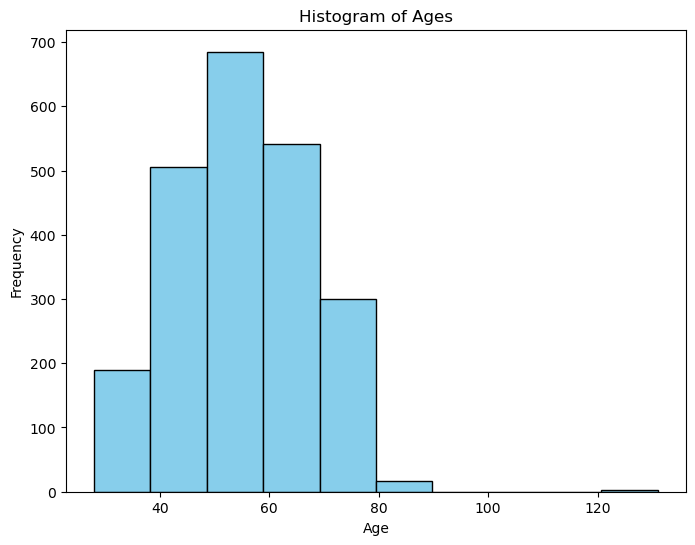

In [139]:
plt.figure(figsize=(8, 6))
plt.hist(mkt_data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Observation - A potential outlier visible for values more than 100

### 2. Identify outliers ###

In [32]:
### Age outliers ###

In [140]:
# Calculating value which lies beyond a certain range (Inter Quartile Range)

Q1 = mkt_data.Age.quantile(0.25)
Q3 = mkt_data.Age.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = mkt_data[(mkt_data['Age'] < lower_bound) | (mkt_data['Age'] > upper_bound)]

print("Displaying potential Outliers in Age: ")
print()
outliers

Displaying potential Outliers in Age: 



,ID,Year_Birth,Education,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
513,11004,1893,2n Cycle,Sgl,22,Single,60182.0,0,1,2014-05-17,...,0,0,0,0,0,0,0,SA,131,1
827,1150,1899,PhD,Cpl,1853,Together,83532.0,0,0,2013-09-26,...,0,0,1,0,0,0,0,SP,125,0
2233,7829,1900,2n Cycle,Sgl,65,Divorced,36640.0,1,0,2013-09-26,...,0,0,0,0,0,0,1,IND,124,1


In [141]:
# Substituting outlier values with upper and lower bound values #

mkt_data['Age'] = mkt_data['Age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
outliers = mkt_data[(mkt_data['Age'] < lower_bound) | (mkt_data['Age'] > upper_bound)]

print("Displaying potential Outliers in Age: ")
print()
outliers

Displaying potential Outliers in Age: 



,ID,Year_Birth,Education,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children


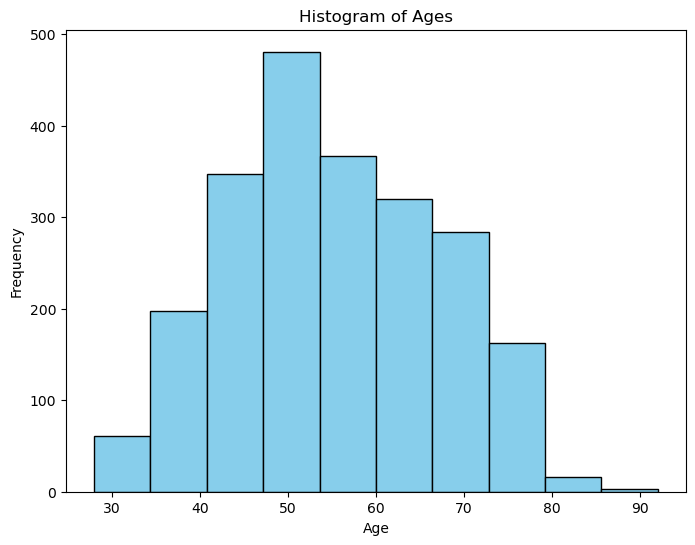

In [142]:
# Updated Histogram after Outlier treatment

plt.figure(figsize=(8, 6))
plt.hist(mkt_data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
### Salary outliers ###

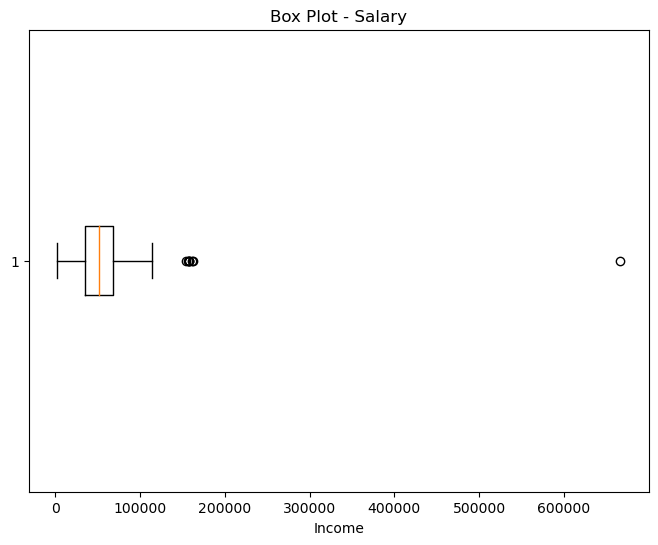

In [143]:
plt.figure(figsize=(8, 6))
plt.boxplot(mkt_data['Income'], vert=False)
plt.title('Box Plot - Salary')
plt.xlabel('Income')
plt.show()

In [144]:
#identify_outlier(field=mkt_data['Income'])

Q1 = mkt_data.Income.quantile(0.25)
Q3 = mkt_data.Income.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = mkt_data[(mkt_data['Income'] < lower_bound) | (mkt_data['Income'] > upper_bound)]

print("Displaying potential Outliers in Income: ")
print()
outliers

Displaying potential Outliers in Income: 



,ID,Year_Birth,Education,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
325,4931,1977,Graduation,Cpl,1730,Together,157146.0,0,0,2013-04-29,...,0,0,0,0,0,0,0,SA,47.0,0
497,1501,1982,PhD,Cpl,1717,Married,160803.0,0,0,2012-08-04,...,0,0,0,0,0,0,0,US,42.0,0
527,9432,1977,Graduation,Cpl,62,Together,666666.0,1,0,2013-06-02,...,0,0,0,0,0,0,0,SA,47.0,1
731,1503,1976,PhD,Cpl,107,Together,162397.0,1,1,2013-06-03,...,0,0,0,0,0,0,0,SP,48.0,2
853,5336,1971,Master,Cpl,59,Together,157733.0,1,0,2013-06-04,...,0,0,0,0,0,0,0,SP,53.0,1
1826,5555,1975,Graduation,Sgl,6,Divorced,153924.0,0,0,2014-02-07,...,0,0,0,0,0,0,0,SP,49.0,0
1925,11181,1949,PhD,Cpl,8,Married,156924.0,0,0,2013-08-29,...,0,0,0,0,0,0,0,CA,75.0,0
2204,8475,1973,PhD,Cpl,1608,Married,157243.0,0,1,2014-03-01,...,0,0,0,0,0,0,0,IND,51.0,1


In [145]:
# Identifying Mean Income

print("Mean Value of income: ",mkt_data.Income.mean())

Mean Value of income:  52253.14923214286


In [146]:
mkt_data['Income'] = mkt_data['Income'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [147]:
outliers = mkt_data[(mkt_data['Income'] < lower_bound) | (mkt_data['Income'] > upper_bound)]

In [148]:
outliers

,ID,Year_Birth,Education,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children


In [149]:
print("Updated Mean of income: ",mkt_data.Income.mean())

Updated Mean of income:  51881.04833928571


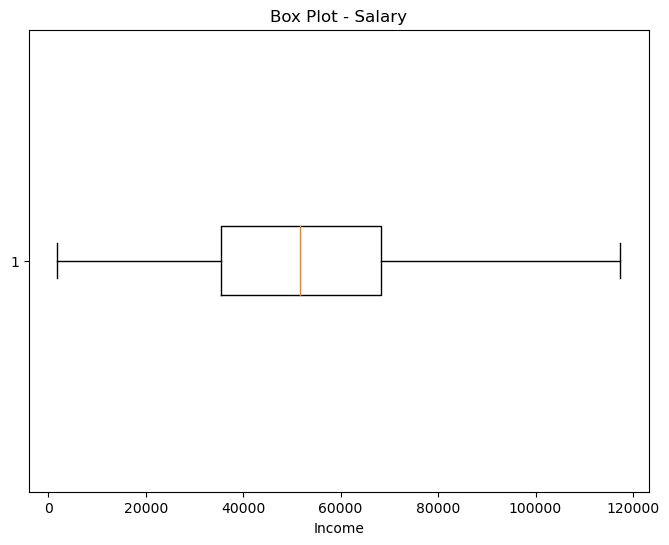

In [150]:
# Updated Box Plot

plt.figure(figsize=(8, 6))
plt.boxplot(mkt_data['Income'], vert=False)
plt.title('Box Plot - Salary')
plt.xlabel('Income')
plt.show()

## (E) CATEGORICAL VARIABLES

In [108]:
# Here we are considering case of Education, Marital Status and Country

## 1. Dealing with Country

In [151]:
# Creating dummy variables for Country

mkt_encoded = pd.get_dummies(mkt_data, columns = ['Country'], dtype='int', prefix = 'Con')

In [152]:
#mkt_data = pd.concat([mkt_data, mkt_encoded], axis = 1)
mkt_encoded

,ID,Year_Birth,Education,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,Age,Children,Con_AUS,Con_CA,Con_GER,Con_IND,Con_ME,Con_SA,Con_SP,Con_US
0,1826,1970,Graduation,Sgl,1190,Divorced,84835.0,0,0,2014-06-16,...,54.0,0,0,0,0,0,0,0,1,0
1,1,1961,Graduation,Sgl,577,Single,57091.0,0,0,2014-06-15,...,63.0,0,0,1,0,0,0,0,0,0
2,10476,1958,Graduation,Cpl,251,Married,67267.0,0,1,2014-05-13,...,66.0,1,0,0,0,0,0,0,0,1
3,1386,1967,Graduation,Cpl,11,Together,32474.0,1,1,2014-05-11,...,57.0,2,1,0,0,0,0,0,0,0
4,5371,1989,Graduation,Sgl,91,Single,21474.0,1,0,2014-04-08,...,35.0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Sgl,689,Divorced,66476.0,0,1,2013-03-07,...,48.0,1,0,0,0,0,0,0,0,1
2236,5263,1977,2n Cycle,Cpl,55,Married,31056.0,1,0,2013-01-22,...,47.0,1,0,0,0,0,0,0,1,0
2237,22,1976,Graduation,Sgl,309,Divorced,46310.0,1,0,2012-12-03,...,48.0,1,0,0,0,0,0,0,1,0
2238,528,1978,Graduation,Cpl,1383,Married,65819.0,0,0,2012-11-29,...,46.0,0,0,0,0,1,0,0,0,0


## 2. Dealing with OrdinalEncoding for Education

In [157]:
# Assuming Priority Value of Educational Category as below:

# 1 -> Basic
# 2 -> 2n Cycle
# 3 -> Graduation
# 4 -> Master
# 5 -> PhD

print("Unique fields of Education: ",mkt_data.Education.unique())

Unique fields of Education:  ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [158]:
# Encoding values as per above assumption

oe = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']])

In [159]:
# Adding a column of Educational Priority value k/a Ed_Priority

mkt_data.insert(loc=3, column = 'Ed_Priority', value = pd.DataFrame(oe.fit_transform(mkt_data[['Education']])))

In [160]:
print("Displaying newly added encoded category")
print()
mkt_data.head()

Displaying newly added encoded category



,ID,Year_Birth,Education,Ed_Priority,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
0,1826,1970,Graduation,2.0,Sgl,1190,Divorced,84835.0,0,0,...,0,0,0,0,0,1,0,SP,54.0,0
1,1,1961,Graduation,2.0,Sgl,577,Single,57091.0,0,0,...,0,0,0,0,1,1,0,CA,63.0,0
2,10476,1958,Graduation,2.0,Cpl,251,Married,67267.0,0,1,...,0,0,0,0,0,0,0,US,66.0,1
3,1386,1967,Graduation,2.0,Cpl,11,Together,32474.0,1,1,...,0,0,0,0,0,0,0,AUS,57.0,2
4,5371,1989,Graduation,2.0,Sgl,91,Single,21474.0,1,0,...,1,0,0,0,0,1,0,SP,35.0,1


## 3. Using One hot encoding for Marital Status

In [161]:
print("Unique fields of Marital Status: ", mkt_data.Marital_Status.unique())

Unique fields of Marital Status:  ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [162]:
# Defining onehotencoder options

OHE = OneHotEncoder(sparse_output=False)

In [163]:
# Generating a transformed one hot encoded output

marital_status_encoded = OHE.fit_transform(mkt_data[['Marital_Status']])
category_names = [category for category in OHE.get_feature_names_out(['Marital_Status'])]
marital_status_cat = pd.DataFrame(marital_status_encoded, columns=category_names)

In [165]:
print("Displaying One Hot encoded values for marital Status")
print()
marital_status_cat.head()

Displaying One Hot encoded values for marital Status



,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## (F) HEATMAP TO SHOW CORRELATION

In [167]:
print("Displaying variables to selecty for Correlation: ")
mkt_data.head()

Displaying variables to selecty for Correlation: 


,ID,Year_Birth,Education,Ed_Priority,Mcat,TExpenditure,Marital_Status,Income,Kidhome,Teenhome,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
0,1826,1970,Graduation,2.0,Sgl,1190,Divorced,84835.0,0,0,...,0,0,0,0,0,1,0,SP,54.0,0
1,1,1961,Graduation,2.0,Sgl,577,Single,57091.0,0,0,...,0,0,0,0,1,1,0,CA,63.0,0
2,10476,1958,Graduation,2.0,Cpl,251,Married,67267.0,0,1,...,0,0,0,0,0,0,0,US,66.0,1
3,1386,1967,Graduation,2.0,Cpl,11,Together,32474.0,1,1,...,0,0,0,0,0,0,0,AUS,57.0,2
4,5371,1989,Graduation,2.0,Sgl,91,Single,21474.0,1,0,...,1,0,0,0,0,1,0,SP,35.0,1


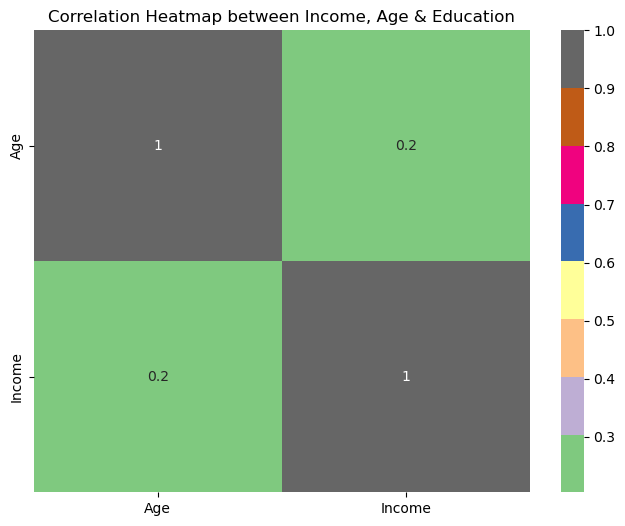

<Figure size 640x480 with 0 Axes>

In [168]:
# Assumption - We are considering to find a correlation between Age, Income and Ed_priority using seaborn heatmap

plt.figure(figsize=(8, 6))
#sns.heatmap(mkt_data[['Age', 'Income','Ed_Priority']].corr(), cmap = 'Accent', annot = True)
sns.heatmap(mkt_data[['Age', 'Income']].corr(), cmap = 'Accent', annot = True)
plt.title('Correlation Heatmap between Income, Age & Education')
plt.show()
plt.savefig('corr.png')

A scatter plot for above heatmap: 


<Axes: xlabel='Age', ylabel='Income'>

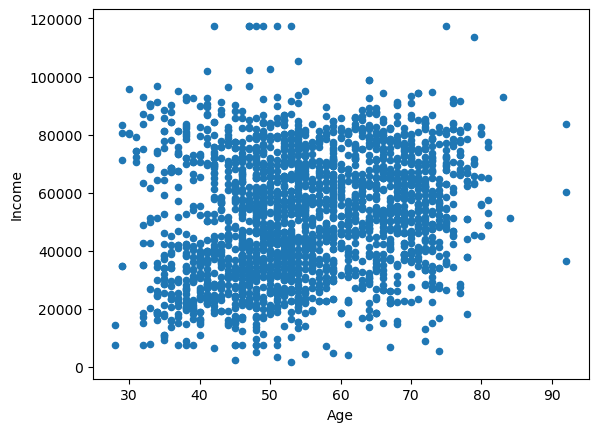

In [170]:
print("A scatter plot for above heatmap: ")
mkt_data.plot(kind = 'scatter', x = 'Age', y = 'Income')

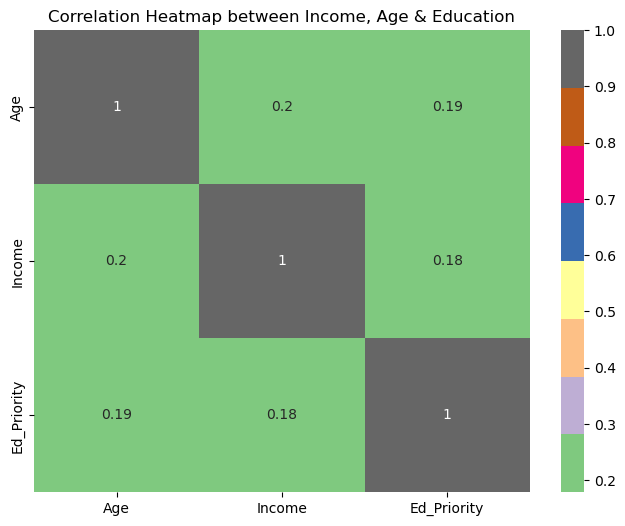

<Figure size 640x480 with 0 Axes>

In [171]:
# A heatmap between 3 variables

plt.figure(figsize=(8, 6))
sns.heatmap(mkt_data[['Age', 'Income','Ed_Priority']].corr(), cmap = 'Accent', annot = True)
plt.title('Correlation Heatmap between Income, Age & Education')
plt.show()
plt.savefig('corr.png')

## (G) HYPOTHESIS TESTSING

### 1. Older people are not as tech-savvy and probably prefer shopping in-store.

In [1]:
# Null Hypothesis (H0): Older people are less tech-savvy and prefer shopping in-store compared to younger people.
# Alternative Hypothesis (H1): There is no significant difference in tech-savviness or preference for in-store shopping between older and younger people.

# Assumptions - To test this Hypothesis, we will compare Techsaviness in terms of NumWebVisitsMonth & Instore purchases through NumStorePurchases

In [175]:
# Generating Number of Web visit per month for people above and below age of 50 

tech_savvy_old = mkt_data[mkt_data['Age'] >= 50]['NumWebVisitsMonth']
tech_savvy_young = mkt_data[mkt_data['Age'] < 50]['NumWebVisitsMonth']

In [178]:
print("Mean of Web visit of People older than 50: ",tech_savvy_old.mean(), "Mean of Web visit of People younger than 50: ", tech_savvy_young.mean()  ) 

Mean of Web visit of People older than 50:  5.2154582763337896 Mean of Web visit of People younger than 50:  5.506426735218509


In [179]:
# Performing a independent t-test on these values

ttest_ind(tech_savvy_old, tech_savvy_young)

TtestResult(statistic=-2.7057728400601433, pvalue=0.006866260370517737, df=2238.0)

In [180]:
# Generating Number of Instore purchasaes for people above and below age of 50 

instore_old = mkt_data[mkt_data['Age'] >= 50]['NumStorePurchases']
instore_young = mkt_data[mkt_data['Age'] < 50]['NumStorePurchases']

In [181]:
# Performing a independent t-test on these values

ttest_ind(instore_old, instore_young)

TtestResult(statistic=4.493210537290091, pvalue=7.373005629031434e-06, df=2238.0)

In [182]:
# Observation
# As p-value for both independent t-test are significantly small, we can safely reject H0 and establish 
# There is no significant difference in tech-savviness or preference for in-store shopping between older and younger people.

### 2. Customers with kids probably have less time to visit a store and would prefer to shop online.

In [183]:
# Null Hypothesis (H0): Customer with kids prefer shop online.
# Alternative Hypothesis (H1): Customer with kids not necessarily shop online.

# Assumption - As there is no criteria of timings spend in shopping given in data, we will decide the data based on NumWebPurchases & NumStorePurchases for the different customers.
# Refined Hypothesis statement

# H0: Customer with Kids -> mean(NumWebPurchases) > mean(NumStorePurchases)
# H1: Customer with Kids -> mean(NumWebPurchases) < mean(NumStorePurchases)

# Here we will go with left tailed independent t-test
 


In [184]:
# Calculating values

num_web = mkt_data[mkt_data['Kidhome'] >= 1]['NumWebPurchases']
numstore = mkt_data[mkt_data['Kidhome'] >= 1]['NumStorePurchases']

In [185]:
# Performing a levene test to identify variance equality assumption

st.levene(mkt_data.NumWebPurchases[mkt_data.Kidhome >=1],mkt_data.NumStorePurchases[mkt_data.Kidhome >=1] )

LeveneResult(statistic=8.990907664252665, pvalue=0.0027486300890385605)

In [186]:
# observation - As p value from levene test is significantly low, we can go with normal ttest

In [187]:
ttest_ind(num_web,numstore)

TtestResult(statistic=-9.489656858342025, pvalue=6.70298947771397e-21, df=1892.0)

In [188]:
# As p-value is significantly less we can safely reject Null Hypothesis

### 3. Other distribution channels may cannibalize sales at the store.

In [189]:
# Assumptions:
# Here we will be creating additional column OtherPurchase which is combination of NumWebPurchases & NumCatalogPurchases

# H0: mean(NumStorePurchases) < mean(OtherPurchase)
# H1: mean(NumStorePurchases) >= mean(OtherPurchase)

# As the columns are independent we will be performing Left tailed independent ttest

### '# Generating additional column'

In [190]:
mkt_data.insert(loc = 15, column = 'OtherPurchase', value = mkt_data['NumWebPurchases'] + mkt_data['NumCatalogPurchases'])

In [191]:
# Performing a levene test

In [192]:
st.levene(mkt_data['NumStorePurchases'], mkt_data['OtherPurchase'])

LeveneResult(statistic=356.2462570524069, pvalue=1.609212754936288e-76)

In [193]:
# Observation - As levene test generating a very less p value we will go with normal t-test

In [194]:
ttest_ind(mkt_data['NumStorePurchases'], mkt_data['OtherPurchase'], alternative='less')

TtestResult(statistic=-7.884334964023309, pvalue=1.971324447658957e-15, df=4478.0)

In [195]:
# As p-value is significantly less we can safely reject null Hypothesis

### 4. Does the US fare significantly better than the rest of the world in terms of total purchases?

In [196]:

# H0: mean(Total Spending by US) > mean(Total spending by Other world)
# H1: mean(Total Spending by US) < mean(Total spending by Other world)

# Assumption: Here we will consider Column TExpenditure generated in previous exercises

# variables for testing
total_spending_us = mkt_data['TExpenditure'][mkt_data.Country == 'US']
total_spending_other = mkt_data['TExpenditure'][mkt_data.Country != 'US']



In [197]:
# Levene Test to verify if variances  equal or not

levene_test_spending = st.levene(total_spending_us, total_spending_other)


In [198]:
levene_test_spending

LeveneResult(statistic=1.4726805701696453, pvalue=0.22505129239167973)

In [199]:
# Perform independent t-test 
t_stat_spending, p_value_spending = st.ttest_ind(total_spending_us, total_spending_other)


In [200]:
# Output results
print(f"T-statistic: {t_stat_spending}")
print(f"P-value: {p_value_spending}")


T-statistic: 0.301595620367374
P-value: 0.7629883675772997


In [201]:
# Interpret the results

if p_value_spending < 0.05:
    print("Reject the null hypothesis: There is a significant difference in total spending between the US and the rest of the world.")
else:
    print("Fail to reject the null hypothesis: There may not be a significant difference in total spending between the US and the rest of the world.")


Fail to reject the null hypothesis: There may not be a significant difference in total spending between the US and the rest of the world.


## (G) VISUALIZATION

### 1. Which products are performing the best, and which are performing the least in terms of revenue?

In [31]:
# List of product names
products = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Prods']


In [202]:
# List of revenues generated by them

revenues = [
    mkt_data['MntWines'].sum(),
    mkt_data['MntFruits'].sum(),
    mkt_data['MntMeatProducts'].sum(),
    mkt_data['MntFishProducts'].sum(),
    mkt_data['MntSweetProducts'].sum(),
    mkt_data['MntGoldProds'].sum()
]


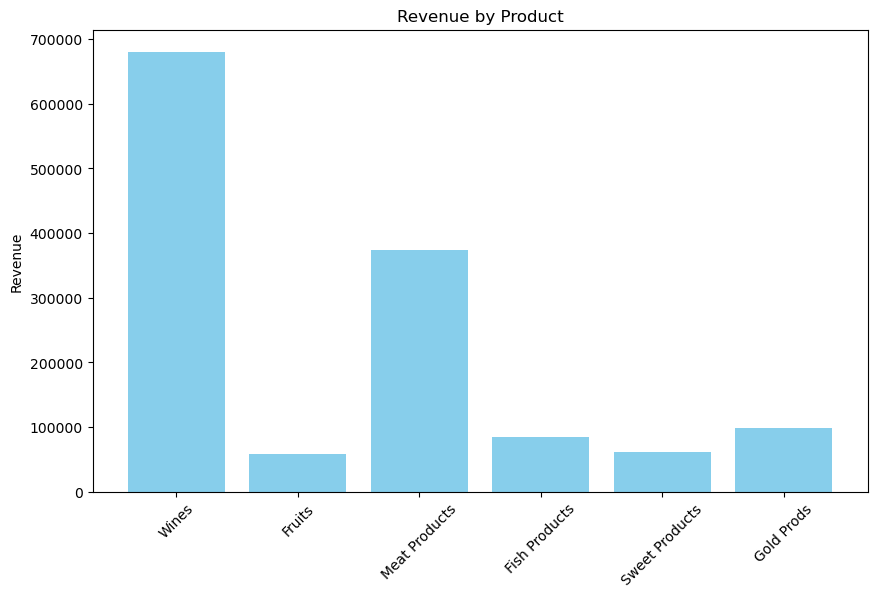

In [204]:
# Create a horizontal bar plot for visualization
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(products, revenues, color='skyblue')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


In [ ]:
# Observation -  Wines sale was max and Fruits and Sweet product sale was minimum in all the product.

### 2. Is there any pattern between the age of customers and the last campaign acceptance rate?

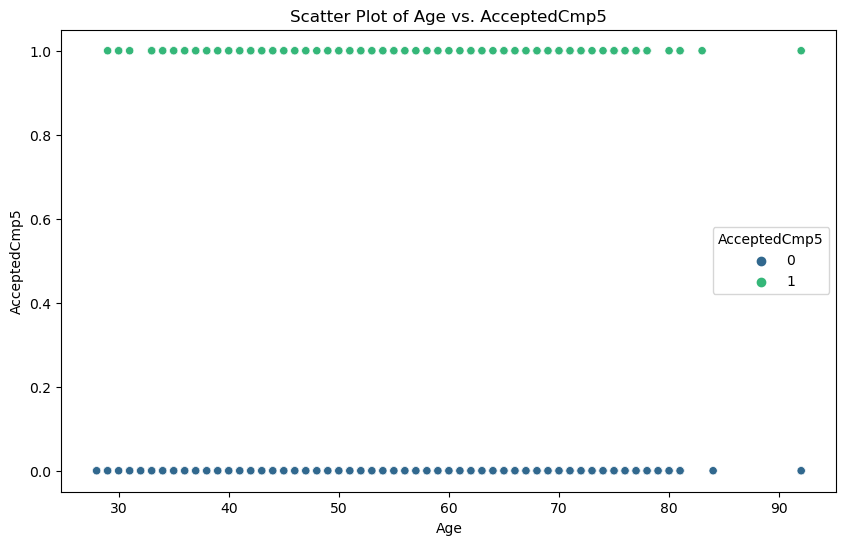

In [205]:
# Take variables as last campaign acceptance and Age

plt.figure(figsize=(10, 6))
sns.scatterplot(x=mkt_data.Age, y='AcceptedCmp5', data=mkt_data, hue=mkt_data.AcceptedCmp5, palette='viridis')
plt.title('Scatter Plot of Age vs. AcceptedCmp5')
plt.xlabel('Age')
plt.ylabel('AcceptedCmp5')
plt.show()


In [206]:
# Observation:-  30-60 age people rating is highest who accepted the last campaign.

### 3. Which Country has the greatest number of customers who accepted the last campaign?

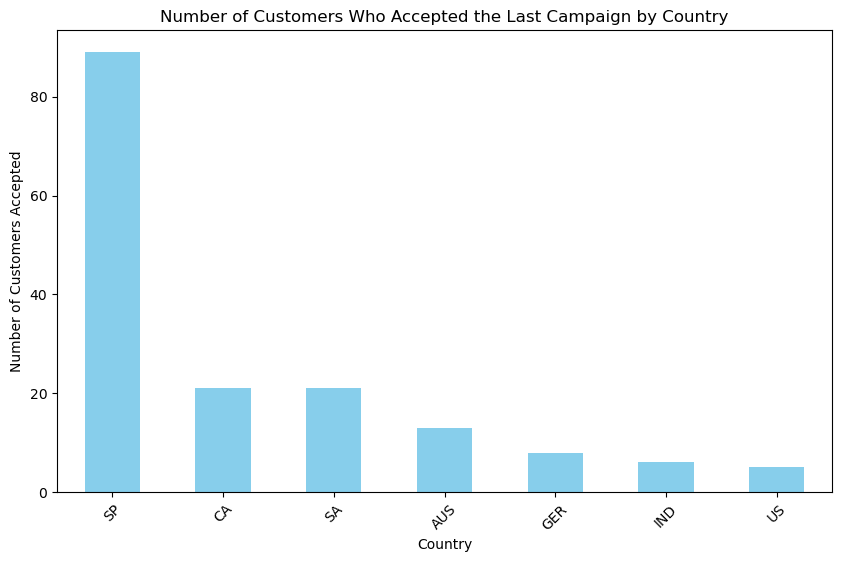

In [207]:
campaign_acceptance_by_country = mkt_data[mkt_data['AcceptedCmp5'] == 1].groupby('Country')['AcceptedCmp5'].count()

# Sort countries by the count of acceptances in descending order
sorted_countries = campaign_acceptance_by_country.sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sorted_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Customers Accepted')
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

# Observation:- SP is the greatest number of customers who accepted the last campaign


### 4. Do you see any pattern in the no. of children at home and total spend?

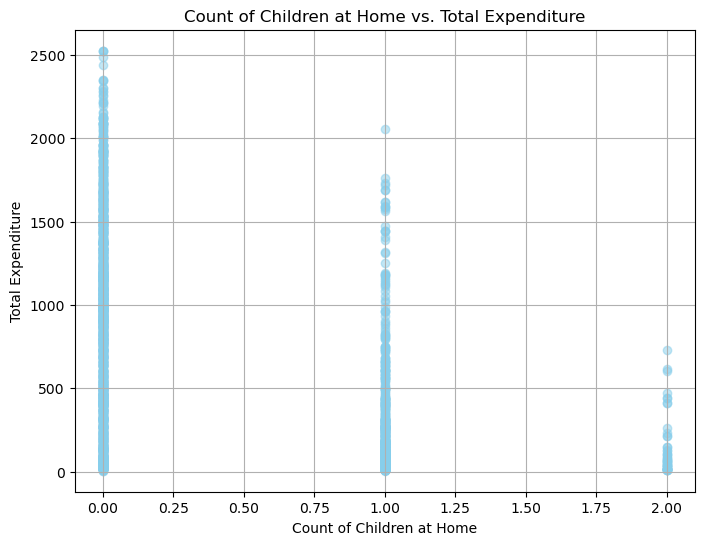

In [209]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mkt_data['Kidhome'], mkt_data['TExpenditure'], color='skyblue', alpha=0.5)
plt.xlabel('Count of Children at Home')
plt.ylabel('Total Expenditure')
plt.title('Count of Children at Home vs. Total Expenditure')
plt.grid(True)
plt.show()




In [211]:
# Observation:- Which People do not have kids spend much and total spending decreased as per kid count increased.

### 5. Education background of the customers who complained in the last 2 years.

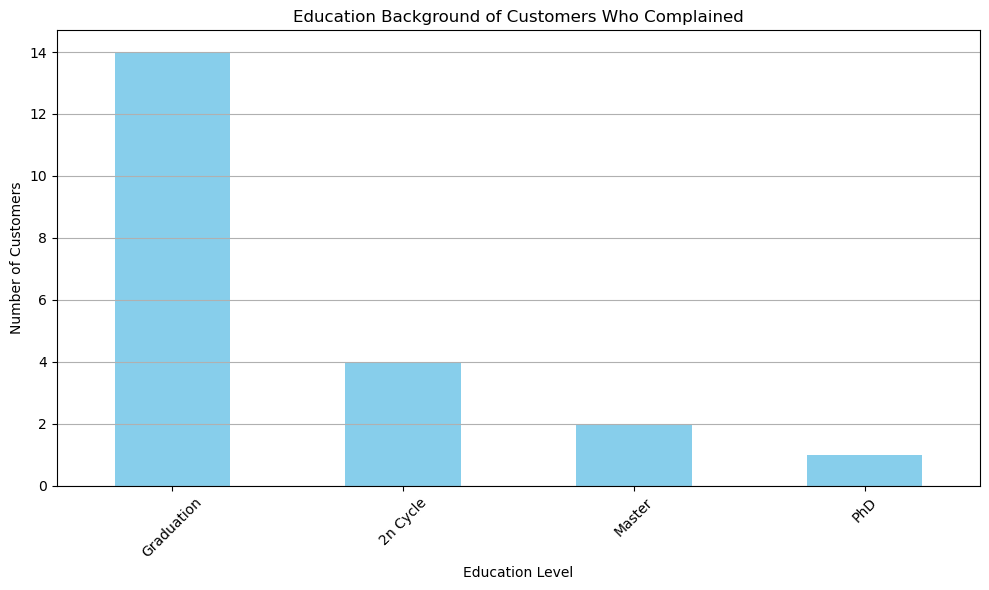

In [212]:
# Filter customers who complained in the last 2 years
com_cust = mkt_data[mkt_data['Complain'] != 0]['Education']

# Count the values
education_counts = com_cust.value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.title('Education Background of Customers Who Complained')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')
plt.tight_layout()
plt.show()




In [213]:
# Observation:- Graduation degree person raised maximum complaints, as basic one have not created any, so they are filtered out

# END OF PROJECT